In [1]:
%matplotlib inline

In [22]:
from functools import partial
from timeit import timeit
from numpy.random import randint

NEGATIVE_INFINITY = float("-inf")
DEFAULT_PRICES = [0, 1, 5, 8, 9, 10, 17, 17, 20, 24, 30]

def recursive_fibonacci(n):
    if 1 >= n:
        return 1

    return recursive_fibonacci(n - 1) + recursive_fibonacci(n - 2)


def memoized_fibonacci(n, cache=None):
    if cache is None:
        cache = [0] * n
        cache[0] = 1
        cache[1] = 1

    if 1 >= n:
        return 1

    if 0 != cache[n]:
        return cache[n]

    result = memoized_fibonacci(n - 1, cache) + memoized_fibonacci(n - 2, cache)
    cache[n] = result
    return result


def bottom_up_fibonnaci(n):
    if n == 0 or n == 1:
        return 1

    # Could avoid saving intermediate values, but I already have this saved
    cache = [1, 1]
    for i in xrange(2, n):
        cache.append(cache[i - 1] + cache[i - 2])

    return cache[n - 1] + cache[n - 2]


def cut_rod(n, prices=DEFAULT_PRICES):
    if n <= 0:
        return 0

    max_price = NEGATIVE_INFINITY
    for i in xrange(n):
        max_price = max(max_price, prices[i + 1] + cut_rod(n - i - 1, prices))

    return max_price


def memoized_cut_rod(n, prices=DEFAULT_PRICES, cache=None):
    if cache is None:
        cache = [NEGATIVE_INFINITY] * (n + 1)
        cache[0] = 0

    if n <= 0:
        return 0

    if NEGATIVE_INFINITY != cache[n]:
        return cache[n]

    max_price = NEGATIVE_INFINITY
    for i in xrange(n):
        max_price = max(max_price, prices[i + 1] + memoized_cut_rod(n - i - 1, prices, cache))

    cache[n] = max_price
    return max_price


def bottom_up_cut_rod(n, prices=DEFAULT_PRICES):
    if n <= 0:
        return 0

    cache = [0] * (n + 1)

    for j in xrange(1, n + 1):
        max_price = NEGATIVE_INFINITY

        for i in xrange(1, j + 1):
            max_price = max(max_price, prices[i] + cache[j - i])

        cache[j] = max_price

    return cache[n]


def extended_bottom_up_cut_rod(n, prices=DEFAULT_PRICES):
    if n <= 0:
        return [0], [0]

    r_cache = [0] * (n + 1)
    s_cache = [0] * (n + 1)

    for j in xrange(1, n + 1):
        max_price = NEGATIVE_INFINITY

        for i in xrange(1, j + 1):
            new_price = prices[i] + r_cache[j - i]
            if max_price < prices[i] + r_cache[j - i]:
                max_price = new_price
                s_cache[j] = i

        r_cache[j] = max_price

    return r_cache, s_cache


def print_extended_bottom_up_cut_rod(n, prices=DEFAULT_PRICES):
    r_cache, s_cache = extended_bottom_up_cut_rod(n, prices)
    while n > 0:
        current_cut = s_cache[n]
        print current_cut, " ",
        n -= current_cut

    print


In [11]:
import matplotlib.pyplot as plt

def generate_test_data(max_length):
    large_prices = [0]
    for i in xrange(max_length):
        large_prices.append(large_prices[-1] + randint(8))

    results = []
    for i in xrange(max_length + 1):
        print i
        results.append((i, timeit(partial(cut_rod, i, large_prices), number=1)))
        
    return results

results = generate_test_data(30)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


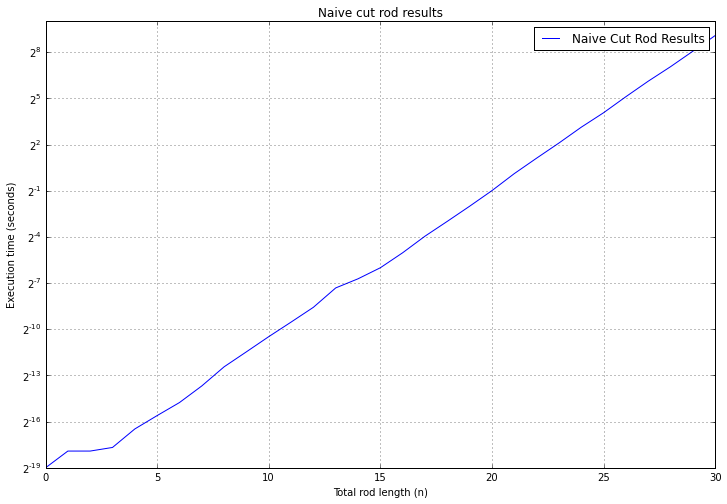

In [17]:
def graph_test_data(results):
    x, y = zip(*results)
    plt.figure(figsize=(12, 8), dpi=400)

    plt.semilogy(x, y, basey=2, label='Naive Cut Rod Results')
    
    plt.grid(True)
    plt.title("Naive cut rod results")
    plt.xlabel("Total rod length (n)")
    plt.ylabel("Execution time (seconds)")
    plt.legend()
    
    plt.show()
    
graph_test_data(results)

In [40]:
from scipy.stats import linregress
from numpy import log2

x, y = zip(*results)
y = log2(y)
slope, intercept, r_value, p_value, std_err = linregress(x, y)
print slope, intercept, r_value

million_years = (10.0 ** 6) * (365) * (24) * (3600)
log_million_years = log2(million_years)
length_million_years = (log_million_years - intercept) / slope
print length_million_years

for i in xrange(40):
    print 2 ** (slope * i + intercept), " ", 

0.961022315202 -20.0478966045 0.999087293689
67.521805158
9.22532706378e-07   1.7958841415e-06   3.49602765016e-06   6.80567807705e-06   1.324853769e-05   2.57907807181e-05   5.02066254868e-05   9.77366784791e-05   0.000190262903103   0.000370382673737   0.000721019824501   0.00140360125942   0.00273237493407   0.00531908384256   0.010354601256   0.0201571869036   0.0392397711723   0.0763876253678   0.148702939263   0.289478355152   0.563524288873   1.09700645488   2.13553024388   4.15721293365   8.09280010209   15.7541637962   30.6684551437   59.7019399485   116.221101354   226.246323177   440.4311967   857.382503737   1669.05696786   3249.13460424   6325.0541352   12312.9124171   23969.4094232   46660.982279   90834.4143488   176826.342419  


In [26]:
def test_extended_cut_rod(max_length):
    large_prices = [0]
    for i in xrange(max_length):
        large_prices.append(large_prices[-1] + randint(8))

    for i in xrange(max_length + 1):
        print i, " ",
        print_extended_bottom_up_cut_rod(i, large_prices)
        
        
def generate_extended_test_data(max_length):
    large_prices = [0]
    for i in xrange(max_length):
        large_prices.append(large_prices[-1] + randint(8))

    results = []
    for i in xrange(max_length + 1):
        print i
        results.append((i, timeit(partial(print_extended_bottom_up_cut_rod, i, large_prices), number=1)))
        
    return results

# test_extended_cut_rod(100)
bottom_up_extended_results = generate_extended_test_data(100)

0

1
1  
2
2  
3
3  
4
1   3  
5
2   3  
6
3   3  
7
1   3   3  
8
2   3   3  
9
3   3   3  
10
1   3   3   3  
11
2   3   3   3  
12
3   3   3   3  
13
1   3   3   3   3  
14
2   3   3   3   3  
15
3   3   3   3   3  
16
1   3   3   3   3   3  
17
2   3   3   3   3   3  
18
3   3   3   3   3   3  
19
1   3   3   3   3   3   3  
20
2   3   3   3   3   3   3  
21
3   3   3   3   3   3   3  
22
1   3   3   3   3   3   3   3  
23
2   3   3   3   3   3   3   3  
24
3   3   3   3   3   3   3   3  
25
1   3   3   3   3   3   3   3   3  
26
2   3   3   3   3   3   3   3   3  
27
3   3   3   3   3   3   3   3   3  
28
1   3   3   3   3   3   3   3   3   3  
29
2   3   3   3   3   3   3   3   3   3  
30
3   3   3   3   3   3   3   3   3   3  
31
1   3   3   3   3   3   3   3   3   3   3  
32
2   3   3   3   3   3   3   3   3   3   3  
33
3   3   3   3   3   3   3   3   3   3   3  
34
1   3   3   3   3   3   3   3   3   3   3   3  
35
2   3   3   3   3   3   3   3   3   3   3   3  
36
3   3   3 

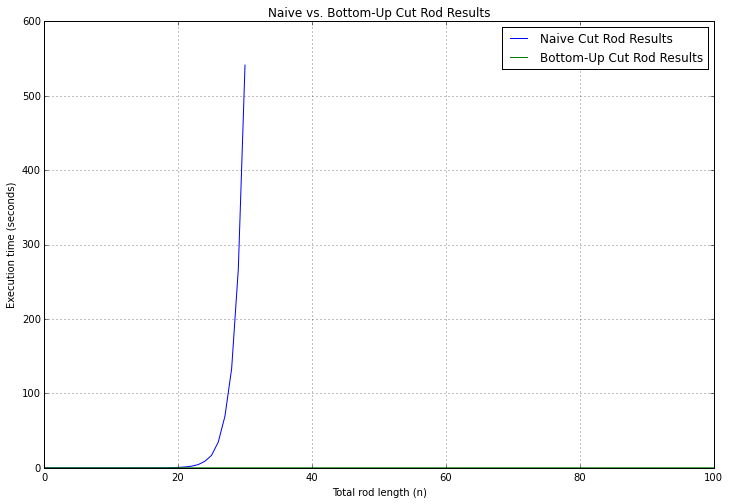

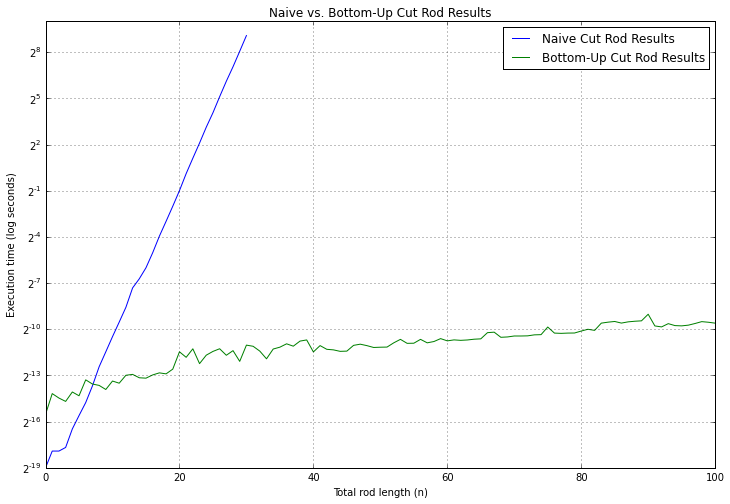

In [31]:
def graph_extended_test_data(results, extended_results):
    orig_x, orig_y = zip(*results)
    bottom_up_x, bottom_up_y = zip(*extended_results)
    plt.figure(figsize=(12, 8), dpi=400)

    plt.plot(orig_x, orig_y, label='Naive Cut Rod Results')
    plt.plot(bottom_up_x, bottom_up_y,label='Bottom-Up Cut Rod Results')
    
    plt.grid(True)
    plt.title("Naive vs. Bottom-Up Cut Rod Results")
    plt.xlabel("Total rod length (n)")
    plt.ylabel("Execution time (seconds)")
    plt.legend()
    
    plt.show()
    
    plt.figure(figsize=(12, 8), dpi=400)

    plt.semilogy(orig_x, orig_y, basey=2, label='Naive Cut Rod Results')
    plt.semilogy(bottom_up_x, bottom_up_y, basey=2, label='Bottom-Up Cut Rod Results')
    
    plt.grid(True)
    plt.title("Naive vs. Bottom-Up Cut Rod Results")
    plt.xlabel("Total rod length (n)")
    plt.ylabel("Execution time (log seconds)")
    plt.legend()
    
    plt.show()
    
graph_extended_test_data(results, bottom_up_extended_results)

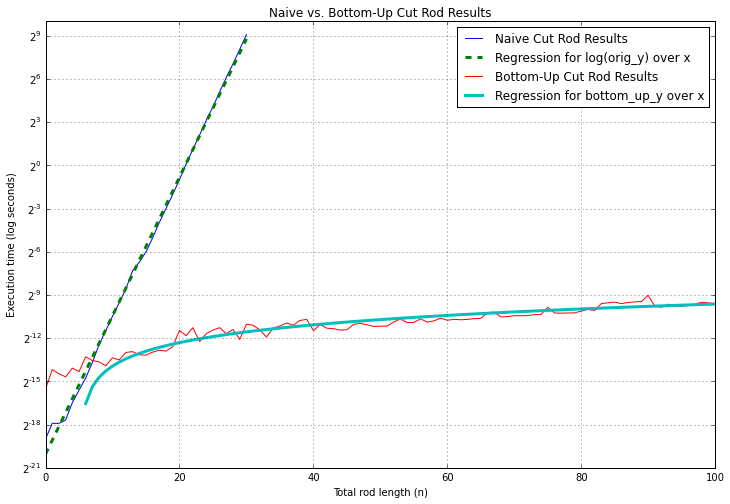

In [47]:
from scipy.stats import linregress
from numpy import log2

def graph_extended_test_data_with_regressions(results, extended_results):
    orig_x, orig_y = zip(*results)
    orig_m, orig_b, orig_r, _, _ = linregress(orig_x, log2(orig_y))
    
    bottom_up_x, bottom_up_y = zip(*extended_results)
    bu_m, bu_b, bu_r, _, _ = linregress(bottom_up_x, bottom_up_y)
    
    plt.figure(figsize=(12, 8), dpi=400)
    
    plt.semilogy(orig_x, orig_y, basey=2, label='Naive Cut Rod Results')
    plt.semilogy(orig_x, [2 ** (x * orig_m + orig_b) for x in orig_x], 
                 linewidth='3.0', ls='dashed', basey=2, label='Regression for log(orig_y) over x')
    
    plt.semilogy(bottom_up_x, bottom_up_y, basey=2, label='Bottom-Up Cut Rod Results')
    plt.semilogy(bottom_up_x, [x * bu_m + bu_b for x in bottom_up_x], 
                 linewidth='3.0', basey=2, label='Regression for bottom_up_y over x')
    
    plt.grid(True)
    plt.title("Naive vs. Bottom-Up Cut Rod Results")
    plt.xlabel("Total rod length (n)")
    plt.ylabel("Execution time (log seconds)")
    plt.legend()
    
    plt.show()
    
graph_extended_test_data_with_regressions(results, bottom_up_extended_results)